# 1. Import Dependencies and Data

**1. TensorFlow-GPU:** A version of TensorFlow that can use GPUs to accelerate computation.

**2. Matplotlib:** A Python library for creating static, animated, and interactive visualizations.

**3. TensorFlow-datasets:** A library for downloading and preparing datasets for use with TensorFlow.

**4. Ipywidgets:** A library for creating interactive widgets in Jupyter notebooks.

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


get list of installed libraries and their versions

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

GPU configuration for TensorFlow

In [19]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
# Brining in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [21]:
# Use the tensorflow datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

In [22]:
ds.as_numpy_iterator().next()['label']

2

# 2. Viz Data and Build Dataset

In [23]:
# Do some data transformation
import numpy as np

In [24]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [25]:
# Getting data out of the pipeline
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

1.   Sets up a subplot formatting with 4 columns and a figure size of 20x20.
2.   Loops 4 times to get 4 images.
3.   In each iteration of the loop, it grabs an image and label from the dataset.
4.   Plots the image in a specific subplot.
5.   Appends the image label as the plot title.

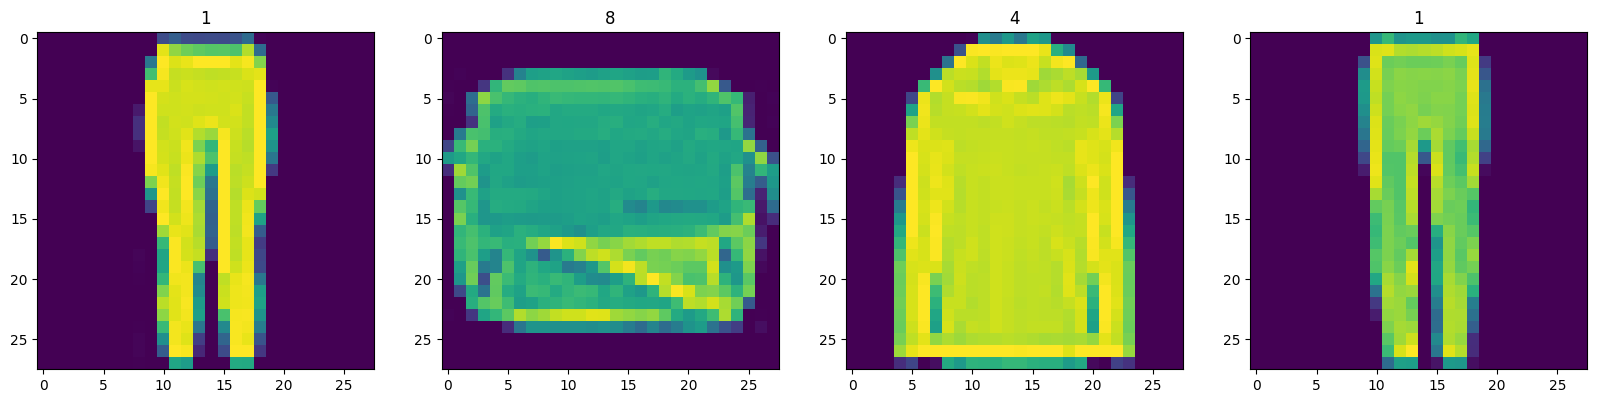

In [26]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

1. Gets the image from the dataset.
2. Scales the image to the range [0, 1].
3. Returns the scaled image.

In [27]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

1. Scales the images in the Fashion-MNIST dataset to the range [0, 1].
2. Caches the dataset in memory.
3. Shuffles the dataset.
4. Batches the dataset into groups of 128 images.
5. Prefetches the next batch of data in the background.

In [28]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [29]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Build Neural Network

### 3.1 Import Modelling Components

In [30]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### 3.2 Build Generator

* The function build_generator() defines a Sequential model that will be used to generate images.
* The first layer of the model is a Dense layer with 77128 units. This layer takes in a random vector of 128 values and reshapes it to a 7x7x128 tensor.
* This tensor represents the beginnings of a generated image.
* The next two layers are UpSampling2D layers. These layers double the size of
the image by inserting zeros in between the existing pixels.
* The next two layers are Conv2D layers with 128 filters and a kernel size of These layers apply convolutions to the image, which helps to refine the details of the image.
* The next two layers are Conv2D layers with 128 filters and a kernel size of These layers apply more convolutions to the image, further refining the details.
* The final layer is a Conv2D layer with 1 filter and a kernel size of 4. This layer applies a convolution to the image and outputs a 28x28x1 image, which is a grayscale image.
* The activation function for all of the layers except the last layer is LeakyReLU. LeakyReLU is a type of activation function that helps to prevent the vanishing gradient problem.
* The activation function for the last layer is Sigmoid. Sigmoid is a type of activation function that outputs values between 0 and 1, which is suitable for images.

In [31]:
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [32]:
generator = build_generator()

In [33]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [35]:
img = generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 80ms/step


array([[[[0.4982108 ],
         [0.4993225 ],
         [0.5037321 ],
         ...,
         [0.5031735 ],
         [0.5007056 ],
         [0.50411963]],

        [[0.5010097 ],
         [0.49987832],
         [0.5093659 ],
         ...,
         [0.5031163 ],
         [0.50079596],
         [0.5058748 ]],

        [[0.504283  ],
         [0.50155276],
         [0.5058843 ],
         ...,
         [0.50063723],
         [0.5016184 ],
         [0.5040255 ]],

        ...,

        [[0.49767488],
         [0.49507937],
         [0.49927577],
         ...,
         [0.5021286 ],
         [0.4998408 ],
         [0.5016141 ]],

        [[0.5006591 ],
         [0.49986222],
         [0.505438  ],
         ...,
         [0.5021159 ],
         [0.5009227 ],
         [0.498735  ]],

        [[0.503474  ],
         [0.49977663],
         [0.50038123],
         ...,
         [0.50197864],
         [0.49906644],
         [0.4976576 ]]],


       [[[0.50155216],
         [0.50363505],
         [0.50

# Visualize output of GAN model
* The generator.predict() function generates 4 new images from a random noise vector.
* The noise vector is a 128x1 dimensional tensor. The generator model is a generative adversarial network (GAN) that can create new images that are similar to the training data.
* The plt.subplots() function creates a subplot with 4 subplots. The figsize argument sets the size of the subplots to 20x20.
* The enumerate() function loops 4 times and gets each image from the generator model.
* The idx variable stores the index of the image.
* The ax[idx].imshow() function plots the image in the subplot at index idx.
* The np.squeeze() function removes the extra dimension from the image tensor.
* The ax[idx].title.set_text(idx) function sets the title of the subplot to the image index.

1/1 [==============================] - 0s 19ms/step


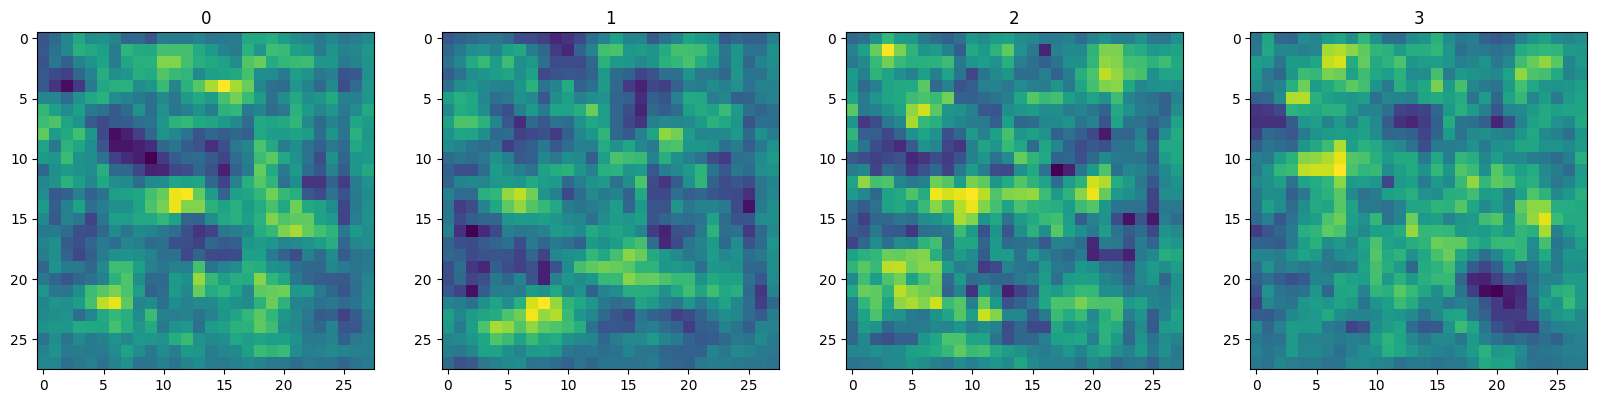

In [37]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

* Defines a sequential model.
* Adds a convolutional layer with 32 filters and a kernel size of 5 to the model.
* Adds a LeakyReLU activation function to the model.
* Adds a dropout layer with a rate of 0.4 to the model.
* Repeats steps 2-4 three more times, increasing the number of filters in each convolutional layer.
* Adds a flattening layer to the model.
* Adds a dropout layer with a rate of 0.4 to the model.
* Adds a dense layer with 1 output neuron and a sigmoid activation function to the model.

In [38]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [39]:
discriminator = build_discriminator()

In [40]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [45]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 58ms/step


In [46]:
img.shape

(4, 28, 28, 1)

In [47]:
discriminator.predict(img)

1/1 [==============================] - 0s 250ms/step


array([[0.5036234],
       [0.5036367],
       [0.5034273],
       [0.5035561]], dtype=float32)

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [48]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [49]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [50]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

The FashionGAN class is a subclass of Model, which is likely from a machine learning library like TensorFlow.

The constructor __init__ takes two main arguments, generator and discriminator, which are neural network models responsible for generating and discriminating fashion images, respectively.

The constructor uses super().__init__(*args, **kwargs) to call the constructor of the base class (presumably Model).

The generator and discriminator models are assigned as attributes of the FashionGAN instance.

The compile method is used to configure the training process of the GAN. It takes optimizer objects (g_opt and d_opt), loss functions (g_loss and d_loss), and other optional arguments.

The compile method uses super().compile(*args, **kwargs) to call the compile method of the base class.

The optimizer objects, loss functions, and other relevant information are stored as attributes of the FashionGAN instance.

The train_step method represents a single training iteration for the GAN.

Real images are obtained from the input batch. Fake images are generated using the generator model by feeding random noise.

The discriminator is trained to distinguish between real and fake images using gradient tape (tf.GradientTape). It calculates discriminator outputs for both real and fake images and creates labels accordingly.

Some noise is added to the true discriminator outputs to improve training stability.

The discriminator's loss is calculated using a binary cross-entropy loss (self.d_loss) by comparing predicted outputs to the generated labels.

Backpropagation is applied to the discriminator's trainable variables using the calculated gradient, and the discriminator's optimizer (self.d_opt) is used to update the discriminator's weights.

The generator is trained to generate images that "fool" the discriminator. Gradient tape is used again to calculate generator loss based on discriminator predictions for generated images.

The generator's loss is calculated using a trick to minimize the predicted labels from the discriminator.

Backpropagation is applied to the generator's trainable variables using the calculated gradient, and the generator's optimizer (self.g_opt) is used to update its weights.

The method returns a dictionary containing the calculated discriminator and generator losses for monitoring during training.

In [51]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [52]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [53]:

# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)


### 4.3 Build Callback

In [54]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

## `ModelMonitor` Callback Explanation

The `ModelMonitor` class is a custom callback in TensorFlow that helps monitor and save generated images during training of a GAN (Generative Adversarial Network). This callback is designed to be used in a Google Colab environment.

- `num_img`: Number of images to generate and monitor after each epoch.
- `latent_dim`: Dimension of the random noise vector used as input for the generator.

### Callback Functionality

During each epoch, at the end of the epoch (`on_epoch_end`), the following steps are performed:

1. Generate `num_img` random latent vectors using uniform random values.
2. Pass these random latent vectors through the generator model to produce generated images.
3. Scale the pixel values of the generated images to the range [0, 255].
4. Convert the generated images to a NumPy array format.
5. For each generated image:
   - Convert the NumPy array to a PIL (Pillow) image using `array_to_img`.
   - Save the PIL image to the 'images' directory with a filename indicating the epoch and image index.

The purpose of this callback is to visualize the progress of the GAN by saving generated images at the end of each epoch. These images can be examined to observe how the generator is improving over training epochs.


In [57]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/sample_data/images/generated/', f'generated_img_{epoch}_{i}.png'))

### 4.3 Train

In [58]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:12 - d_loss: 0.2946 - g_loss: 1.9905

469/469 [==============================] - 75s 161ms/step - d_loss: 0.2786 - g_loss: 2.5713
Epoch 2/20
469/469 [==============================] - 75s 160ms/step - d_loss: 0.3055 - g_loss: 2.6354
Epoch 3/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.5569 - g_loss: 1.4754
Epoch 4/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.6143 - g_loss: 0.7534
Epoch 5/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.4225 - g_loss: 0.1404
Epoch 6/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.3323 - g_loss: 0.0510
Epoch 7/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.3874 - g_loss: 0.0806
Epoch 8/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.7086 - g_loss: 0.4162
Epoch 9/20
469/469 [==============================] - 76s 161ms/step - d_loss: 0.6981 - g_loss: 0.6093
Epoch 10/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.68

### 4.4 Review Performance

## Visualizing Loss Progress

The provided code snippet uses Matplotlib to create a visualization of the loss progress during training. This helps to monitor how the discriminator (`d_loss`) and generator (`g_loss`) losses change over the course of training.

### Steps to Create the Loss Visualization

1. `plt.suptitle('Loss')`: Sets the title of the entire plot as "Loss".

2. `plt.plot(hist.history['d_loss'], label='d_loss')`: Plots the discriminator loss values from the training history. It uses the `hist` object which presumably contains the history of training metrics. The label `'d_loss'` is used to identify this line in the legend.

3. `plt.plot(hist.history['g_loss'], label='g_loss')`: Plots the generator loss values from the training history. Similar to the previous step, the label `'g_loss'` is used for the legend.

4. `plt.legend()`: Adds a legend to the plot, which helps to distinguish between the discriminator and generator loss lines.

5. `plt.show()`: Displays the plot on the output area of the Colab notebook.

By plotting and comparing the changes in discriminator and generator losses, you can gain insights into the training progress and balance between the two components of the GAN. This visualization can help you understand how well the GAN is learning and whether adjustments need to be made to the model or training parameters.


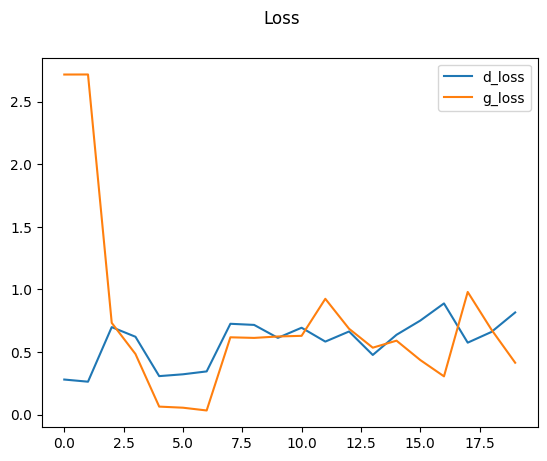

In [59]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

### 5.1 Generate Images

In [63]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 21ms/step


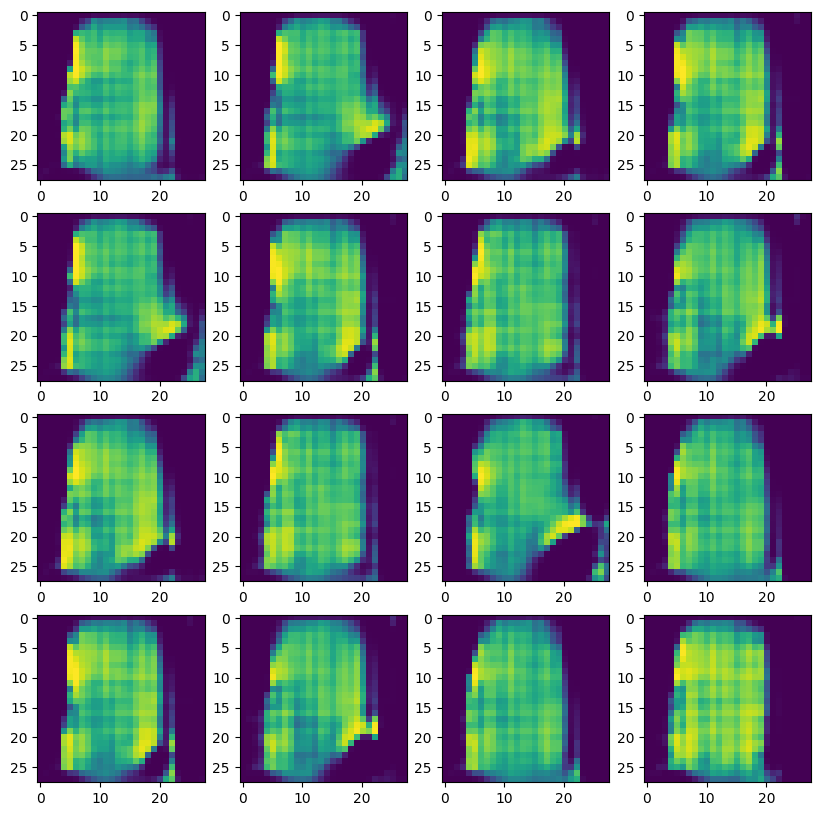

In [64]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

### 5.2 Save the Model

In [65]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')